# Requirements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [3]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 89.0MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [4]:
# Write your code here. Add as many boxes as you need.
df=pd.read_csv('/content/climate-data.csv')

In [5]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [6]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [7]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [8]:
features=['meantemp','humidity','wind_speed','meanpressure']
df_selected=df[features]
df_selected

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


Explore the dataset using visualizations of your choice.

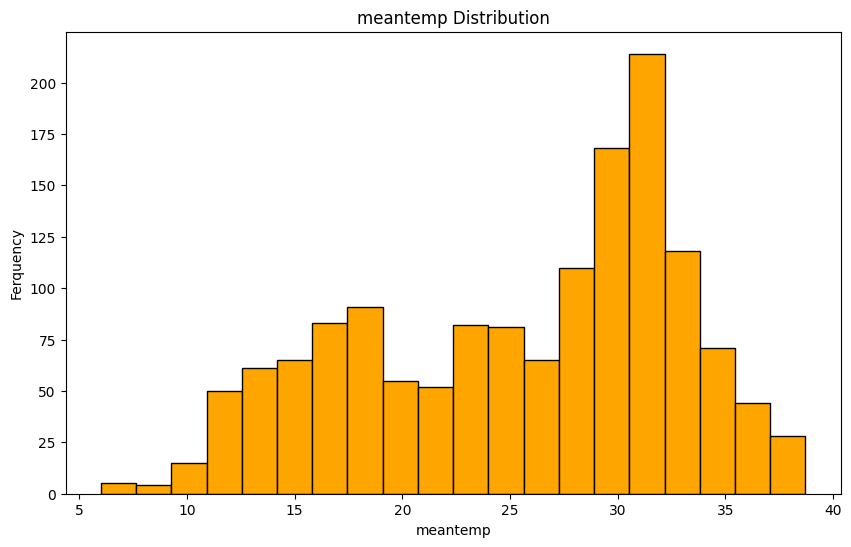

In [21]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(10,6))
plt.hist(df_selected['meantemp'], bins=20, color='orange', edgecolor='black')
plt.title('meantemp Distribution')
plt.xlabel('meantemp')
plt.ylabel('Ferquency')
plt.show()


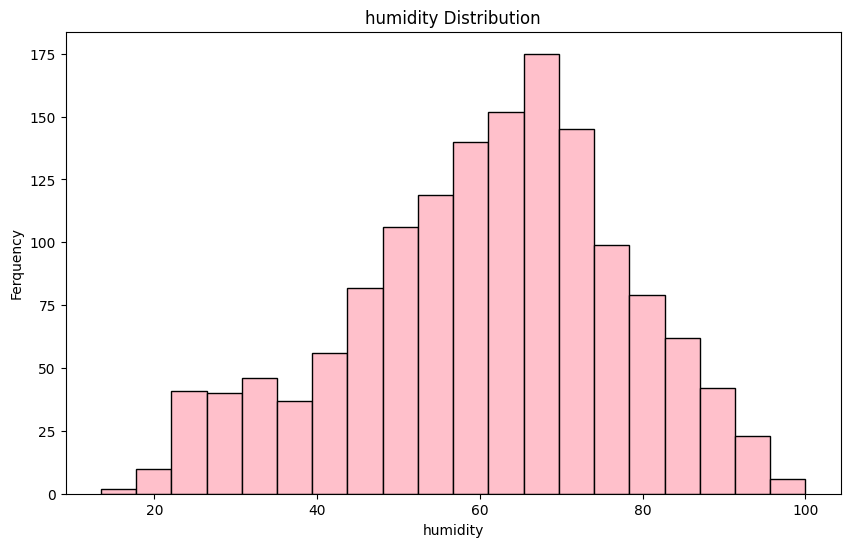

In [22]:
plt.figure(figsize=(10,6))
plt.hist(df_selected['humidity'], bins=20, color='pink', edgecolor='black')
plt.title('humidity Distribution')
plt.xlabel('humidity')
plt.ylabel('Ferquency')
plt.show()

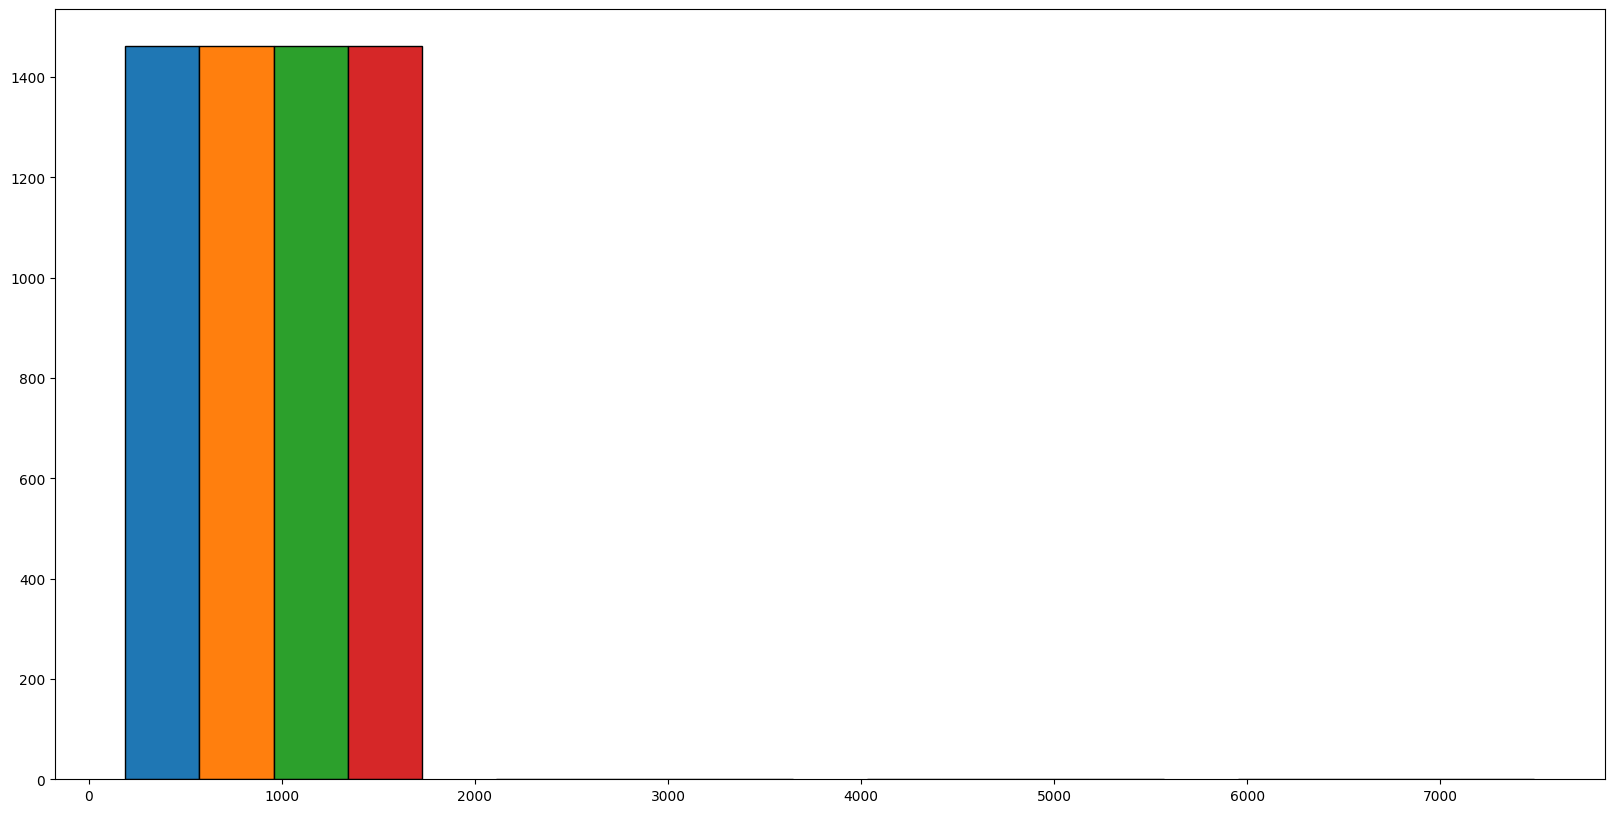

In [18]:
plt.figure(figsize=(20,10))
plt.hist(df_selected, bins=4, edgecolor='black')
plt.show()

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [23]:
# Write your code here. Add as many boxes as you need.
features=['meantemp','humidity','wind_speed','meanpressure']
df_selected=df[features]

In [24]:
df_selected

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [25]:
for feature in features:
  for i in range(1,4):
    df_selected[f'{feature}_lag_{i}']=df_selected[feature].shift(i)


In [27]:
df_selected

,meantemp,humidity,wind_speed,meanpressure,meantemp_lag_1,meantemp_lag_2,meantemp_lag_3,humidity_lag_1,humidity_lag_2,humidity_lag_3,wind_speed_lag_1,wind_speed_lag_2,wind_speed_lag_3,meanpressure_lag_1,meanpressure_lag_2,meanpressure_lag_3
date,,,,,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,10.000000,NaN,NaN,84.500000,NaN,NaN,0.000000,NaN,NaN,1015.666667,NaN,NaN
2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.400000,10.000000,NaN,92.000000,84.500000,NaN,2.980000,0.000000,NaN,1017.800000,1015.666667,NaN
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,10.000000,87.000000,92.000000,84.500000,4.633333,2.980000,0.000000,1018.666667,1017.800000,1015.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,7.400000,71.333333,87.000000,92.000000,1.233333,4.633333,2.980000,1017.166667,1018.666667,1017.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,17.142857,14.000000,67.550000,74.857143,94.300000,8.335000,8.784211,9.085000,1017.200000,1016.952381,1014.350000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,16.850000,17.142857,68.043478,67.550000,74.857143,3.547826,8.335000,8.784211,1015.565217,1017.200000,1016.952381
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,17.217391,16.850000,87.857143,68.043478,67.550000,6.000000,3.547826,8.335000,1016.904762,1015.565217,1017.200000


In [26]:
df_selected.isnull().sum()

meantemp              0
humidity              0
wind_speed            0
meanpressure          0
meantemp_lag_1        1
meantemp_lag_2        2
meantemp_lag_3        3
humidity_lag_1        1
humidity_lag_2        2
humidity_lag_3        3
wind_speed_lag_1      1
wind_speed_lag_2      2
wind_speed_lag_3      3
meanpressure_lag_1    1
meanpressure_lag_2    2
meanpressure_lag_3    3
dtype: int64

In [28]:
df_selected=df_selected.dropna()

In [29]:
df_selected.isnull().sum()

meantemp              0
humidity              0
wind_speed            0
meanpressure          0
meantemp_lag_1        0
meantemp_lag_2        0
meantemp_lag_3        0
humidity_lag_1        0
humidity_lag_2        0
humidity_lag_3        0
wind_speed_lag_1      0
wind_speed_lag_2      0
wind_speed_lag_3      0
meanpressure_lag_1    0
meanpressure_lag_2    0
meanpressure_lag_3    0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [31]:
# Write your code here. Add as many boxes as you need.
X=df_selected.drop('meantemp', axis=1)
Y=df_selected['meantemp']

In [32]:
X_test, X_train, Y_test, Y_train=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
print(f'X_test shape: {X_test.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'Y_test shape: {Y_test.shape}')
print(f'Y_train shape: {Y_train.shape}')

X_test shape: (1167, 15)
X_train shape: (292, 15)
Y_test shape: (1167,)
Y_train shape: (292,)


## Ensemble Learning Methods



In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [36]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred = rf_model.predict(X_test)

In [44]:
mse=mean_squared_error(Y_test, y_pred)
mae=mean_absolute_error(Y_test, y_pred)
rf_rmse=mean_squared_error(Y_test, y_pred, squared=False)
r2=r2_score(Y_test, y_pred)


In [45]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'rf_rmse: {rf_rmse}')
print(f'r2score: {r2}')

MAE: 1.2110151266144962
MSE: 2.5718229311662677
rf_rmse: 1.6036904100125646
r2score: 0.9515372647600725


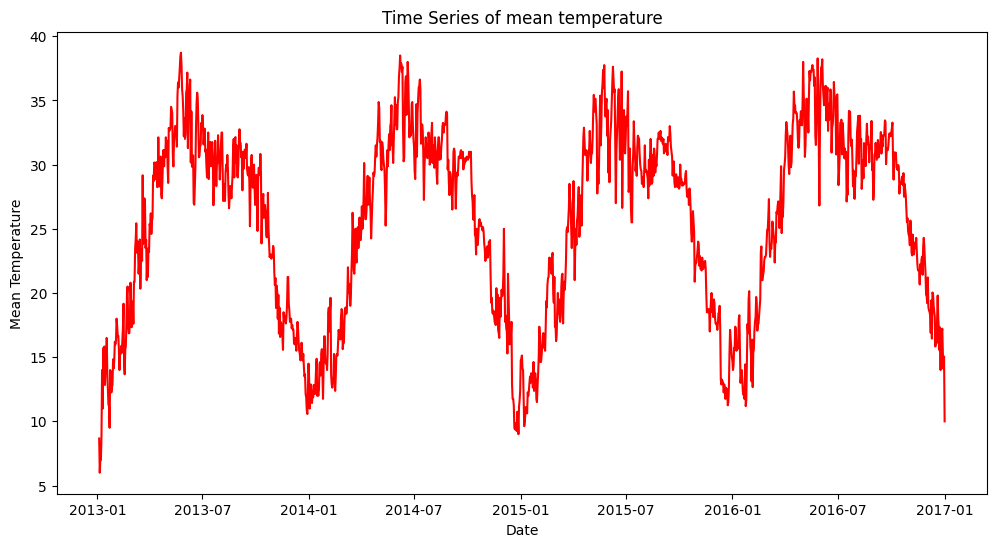

In [47]:
#Time series plot
plt.figure(figsize=(12,6))
plt.plot(df_selected['meantemp'], label='Mean Temperature',color='red')
plt.title('Time Series of mean temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()

In [49]:
lag_features = [f'{feature}_lag_{i}' for feature in features for i in range(1, 4)]
lag_features.append('meantemp')
sns.pairplot(df_selected[lag_features])
plt.suptitle('Pairplot of Lag Features')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [54]:
xgb_model = xgb.XGBRegressor (objective='reg:squarederror', n_estimators=100, random_state=42)


In [55]:
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [57]:
X_pred=xgb_model.predict(X_test)
X_pred

array([31.346899, 16.920305, 35.281975, ..., 31.508028, 27.920424,
       13.917997], dtype=float32)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [58]:
maexgb = mean_absolute_error(Y_test,X_pred)
msexgb = mean_squared_error(Y_test,X_pred)
xgb_rmse=mean_squared_error(Y_test,X_pred,squared=False)
r2xgb = r2_score (Y_test,X_pred)
print(f'MAE: {maexgb}')
print(f'MSE: {msexgb}')
print (f'RF_RMSE: {xgb_rmse}')
print(f'R2: {r2xgb}')

MAE: 1.2434275869833968
MSE: 2.6162803168149353
RF_RMSE: 1.6174919835396202
R2: 0.9506995218174922


In [65]:
param_grid = {'n_estimators': [50, 100, 150, 200, 250]}
tscv = TimeSeriesSplit(n_splits=5)
grid_search= GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)

In [67]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'n_estimators': [50, 100, 150, 200, 250]},
             scoring='neg_mean_squared_error')

In [69]:
best_params=grid_search.best_params_
best_params

{'n_estimators': 100}

In [70]:
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [71]:
best_xgb_predictions = best_xgb_model.predict(X_test)
best_xgb_rmse = mean_squared_error(Y_test, best_xgb_predictions, squared=False)
print(f'RMSE: {best_xgb_rmse}')
print(f'Best parameters: {best_params}')

RMSE: 1.6174919835396202
Best parameters: {'n_estimators': 100}


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the max_depth (`max_depth`) for the Random Forest model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `max_depth` and evaluating the model's performance using cross-validation. Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Random Forest Hyperparameter
Experiment with various values for `max_depth` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.